In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
np.random.seed(0)
dates = pd.date_range('2020-01-01', periods=365, freq='D')  # 1 year of daily data
trend = np.linspace(0, 10, 365)  # Linear trend
seasonal = 10 * np.sin(np.linspace(0, 3 * np.pi, 365))  # Seasonal pattern
noise = np.random.normal(0, 2, 365)  # Random noise
data = trend + seasonal + noise  # Final time series da

In [3]:
# Create the DataFrame
df = pd.DataFrame(data, index=dates, columns=['Value'])

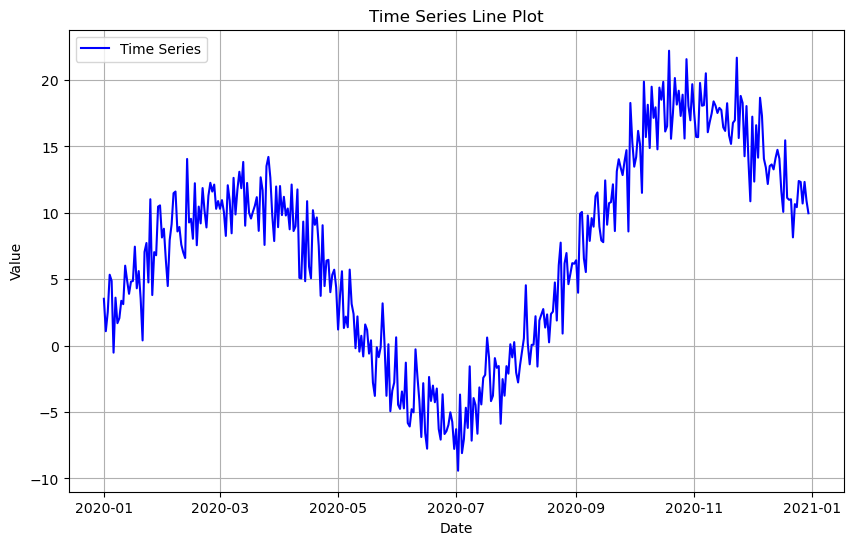

In [4]:
# Line Plot: To visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Value'], label='Time Series', color='b')
plt.title('Time Series Line Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

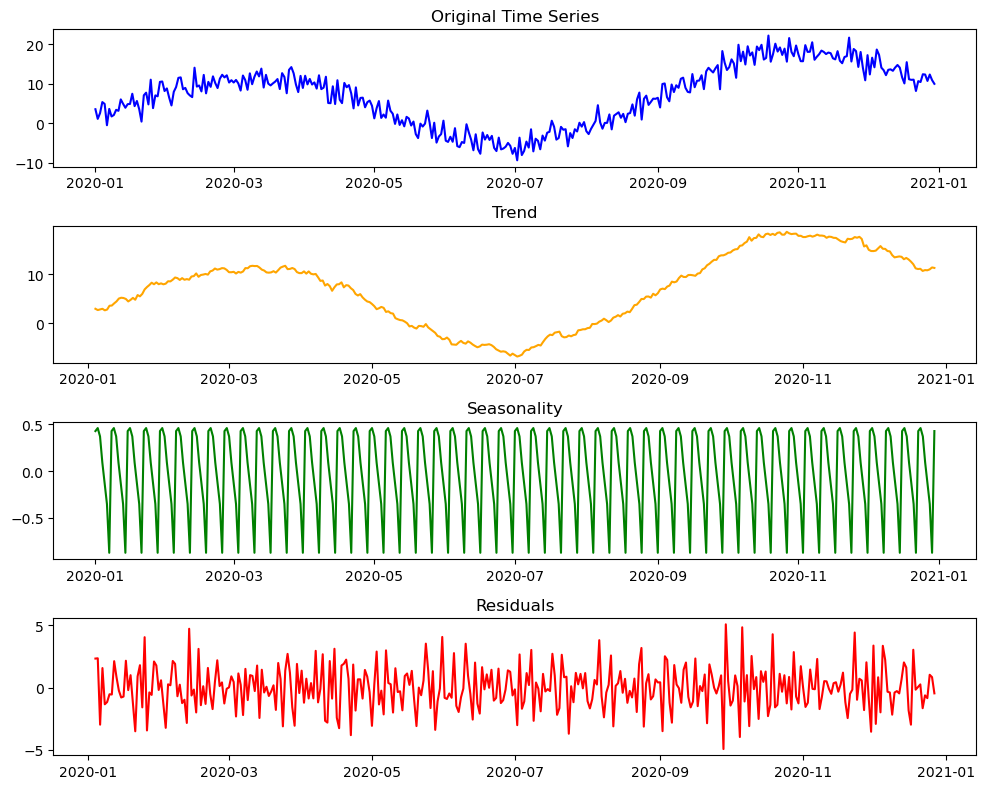

In [9]:
# Decompose the time series with a smaller period (weekly seasonality)
result = seasonal_decompose(df['Value'], model='additive', period=7)

# Plot decomposed components: Trend, Seasonal, and Residual
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df.index, df['Value'], label='Original', color='b')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(df.index, result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.subplot(413)
plt.plot(df.index, result.seasonal, label='Seasonality', color='g')
plt.title('Seasonality')
plt.subplot(414)
plt.plot(df.index, result.resid, label='Residuals', color='r')
plt.title('Residuals')
plt.tight_layout()
plt.show()


In [10]:
data

array([ 3.52810469,  1.08668049,  2.53003455,  5.3401905 ,  4.87884541,
       -0.52619407,  3.61230535,  1.69214365,  2.06994155,  3.37771875,
        3.12320332,  6.02054121,  4.90906405,  3.90328351,  4.81839072,
        4.86636652,  7.45299097,  4.31763284,  5.61434491,  3.53726572,
        0.39355877,  7.05753841,  7.72646835,  4.75694519, 11.02070338,
        3.80847889,  7.04070077,  6.80260983, 10.46601578, 10.55820933,
        8.14384727,  8.80003895,  6.47308254,  4.48706091,  7.94777338,
        9.14607121, 11.47845316, 11.60174772,  8.59596664,  8.93406506,
        7.60393873,  7.01761626,  6.59586603, 14.05477564,  9.27272441,
        9.54859496,  8.04570794, 12.22660836,  7.55787258, 10.46788195,
        9.20372345, 11.86330597, 10.15624028,  8.89840013, 11.27854192,
       12.26020791, 11.59858472, 12.12584535, 10.30093513, 10.88608701,
       10.30194099, 10.95634541, 10.07104554,  8.25995957, 12.07587224,
       10.91927451,  8.45759456, 12.63207074,  9.8738107 , 11.76

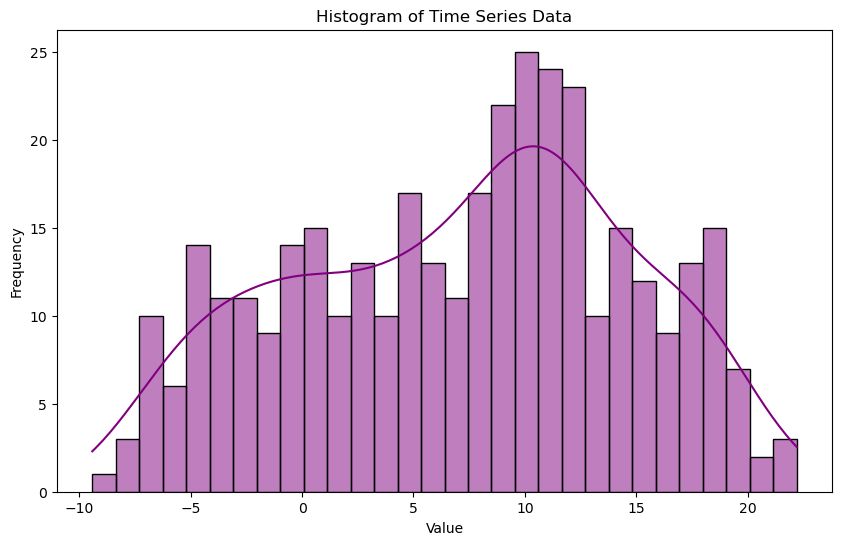

In [7]:
# Histogram: To visualize the distribution of the time series data
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True, color='purple', bins=30)
plt.title('Histogram of Time Series Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

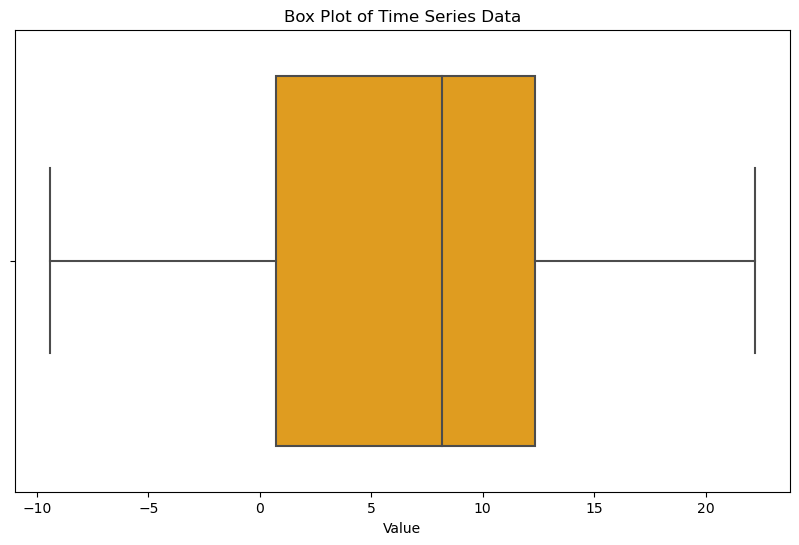

In [8]:
# Box Plot: To visualize outliers and distribution spread
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Value'], color='orange')
plt.title('Box Plot of Time Series Data')
plt.xlabel('Value')
plt.show()